## Solar Readings - Data Visualization

Data taken from home solar panel since it was turned on after installation on 9/1/2015 until current date

Importing required packages

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Reading in solar readings csv file

In [2]:
df = pd.read_csv("2020-04-07.csv")

Checking on data with df.head()

In [3]:
df.shape

(1999, 4)

Getting shape of dataframe

In [4]:
df.head()

,Date,ID,Net Kwh,DailyGenerations
0,9/1/2015,1.0,12.0,12.0
1,9/2/2015,2.0,24.0,12.0
2,9/3/2015,3.0,35.0,11.0
3,9/4/2015,4.0,46.0,11.0
4,9/5/2015,5.0,58.0,12.0


### 1. Plotting the Average Daily Generation by Month

Data wrangling the date column

In [5]:
df_date = df['Date'].str.split("/", n=2, expand=True)
df_date[0] = df_date[0].apply('{:0>2}'.format)
df_date[1] = df_date[1].apply('{:0>2}'.format)
df_date['monthDay']=df_date[0]
df_date['daily'] = df['DailyGenerations']
df_date=df_date.drop([0,1], axis=1)
df_date.columns.values[0]='year'
df_date.head(5)

,year,monthDay,daily
0,2015,09,12.0
1,2015,09,12.0
2,2015,09,11.0
3,2015,09,11.0
4,2015,09,12.0


Grouping by date for daily average per month

In [6]:
df_daily_average = df_date.groupby(['monthDay'], as_index=False).mean()
df_daily_average.head(12)

,monthDay,daily
0,01,4.380645
1,02,6.936620
2,03,7.793548
3,04,9.881890
4,05,10.822581
5,06,12.133333
6,07,12.000000
7,08,10.483871
8,09,9.573333
9,10,8.000000


Getting shape of new dataframe

In [7]:
df_daily_average.shape

(13, 2)

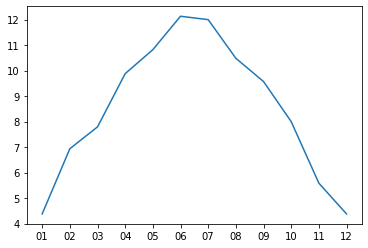

In [8]:
%matplotlib inline
plt.plot(df_daily_average['monthDay'],df_daily_average['daily'])

### Plotting the Total generation per Year

Data wrangling

In [9]:
df['Year'] = df['Date'].str[-4:]
df_year_daily = df.groupby(['Year'], as_index=False).sum()
df_year_daily.head(6)

,Year,ID,Net Kwh,DailyGenerations
0,2015,7503.0,64043.0,892.0
1,2016,111813.0,919165.0,3173.0
2,2017,244915.0,2049880.0,3065.0
3,2018,378140.0,3176235.0,3071.0
4,2019,511365.0,4282289.0,3044.0
5,2020,159985.0,1328467.0,661.0


Plotting bar chart

Text(0.5, 1.0, 'Yearly Generations')

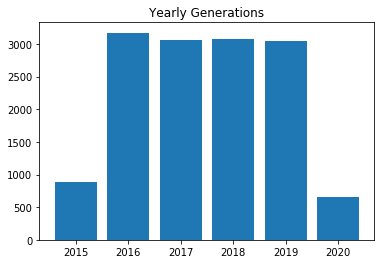

In [10]:
plt.bar(df_year_daily['Year'],df_year_daily['DailyGenerations'])
plt.title('Yearly Generations')

### Monthly Total Generation By Year

Data wrangling

In [11]:
df_date = df['Date'].str.split("/", n=2, expand=True)
df_date[0] = df_date[0].apply('{:0>2}'.format)
df_date[1] = df_date[1].apply('{:0>2}'.format)
df_date.head()


df_date['monthDay']=df_date[0]
df_date['daily'] = df['DailyGenerations']
df_date=df_date.drop([0,1], axis=1)

df_date.columns.values[0]='year'
df_year_2015 = df_date[df_date['year']=="2015"]
df_year_2016 = df_date[df_date['year']=="2016"]
df_year_2017 = df_date[df_date['year']=="2017"]
df_year_2018 = df_date[df_date['year']=="2018"]
df_year_2019 = df_date[df_date['year']=="2019"]
df_year_2020 = df_date[df_date['year']=="2020"]

df_daily_average1 = df_year_2015.groupby(['monthDay'], as_index=False).sum()
df_daily_average2 = df_year_2016.groupby(['monthDay'], as_index=False).sum()
df_daily_average3 = df_year_2017.groupby(['monthDay'], as_index=False).sum()
df_daily_average4 = df_year_2018.groupby(['monthDay'], as_index=False).sum()
df_daily_average5 = df_year_2019.groupby(['monthDay'], as_index=False).sum()
df_daily_average6 = df_year_2020.groupby(['monthDay'], as_index=False).sum()

Plotting line graph

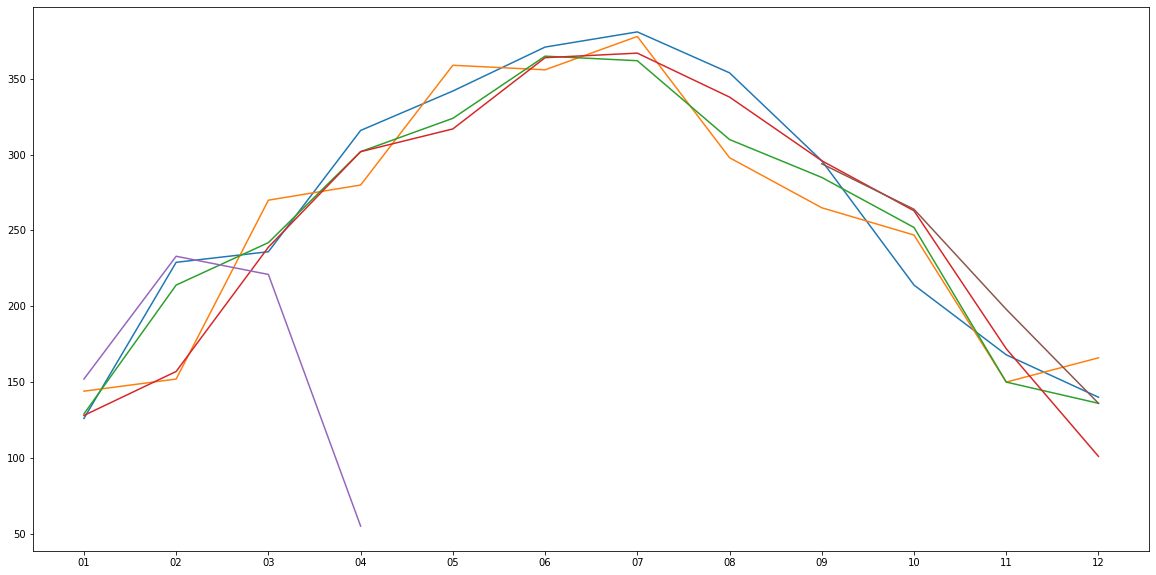

In [12]:
plt.figure(figsize=(20,10))

plt.plot(df_daily_average2['monthDay'],df_daily_average2['daily'])
plt.plot(df_daily_average3['monthDay'],df_daily_average3['daily'])
plt.plot(df_daily_average4['monthDay'],df_daily_average4['daily'])
plt.plot(df_daily_average5['monthDay'],df_daily_average5['daily'])
plt.plot(df_daily_average6['monthDay'],df_daily_average6['daily'])
plt.plot(df_daily_average1['monthDay'],df_daily_average1['daily'])